In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the files
sd = pd.read_csv('sector_data.csv')
dd = pd.read_csv('district_data.csv')
file = pd.read_csv('postcodes_labelled.csv')
df = pd.DataFrame(file)


## Sorting out/ uniting by postcode

**District_Data (dd) doesnt need to be modified becuase its in the format we edited the other postcodes to only get the district. (It contains only/sttrictly district data)**

In [3]:
#sort out postcode
def postcode_fixer_df(postcode):
    fixed_postcode = "".join(postcode.split()).upper()
    final_postcode = fixed_postcode[:-3]
    return final_postcode

# postcode_fixer_df('sw1a 1aa')

In [4]:
df['postcode'] = df.postcode.apply(lambda x: postcode_fixer_df(x))
df.postcode.nunique();
df

,postcode,easting,northing,soilType,elevation,localAuthority,riskLabel,medianPrice,historicallyFlooded
0,OL9,390978,403269,Unsurveyed/Urban,130,Oldham,1,119100.0,False
1,WV13,396607,298083,Unsurveyed/Urban,130,Walsall,1,84200.0,False
2,LS12,427859,432937,Unsurveyed/Urban,60,Leeds,1,134900.0,False
3,SK15,395560,397900,Unsurveyed/Urban,120,Tameside,1,170200.0,False
4,TS17,445771,515362,Unsurveyed/Urban,20,Stockton-on-Tees,1,190600.0,False
...,...,...,...,...,...,...,...,...,...
29995,LS16,425977,438923,Unsurveyed/Urban,160,Leeds,1,NaN,False
29996,SK8,384808,387982,Unsurveyed/Urban,40,Stockport,1,328700.0,False
29997,HD7,409215,416819,Cambisols,310,Kirklees,1,214500.0,False
29998,NE16,419672,560517,Unsurveyed/Urban,130,Gateshead,1,273100.0,False


In [5]:
def postcode_fixer_sd(postcode):
    fixed_postcode = "".join(postcode.split()).upper()
    final_postcode = postcode[:-1]
    return final_postcode

In [6]:
sd['postcode'] = sd.postcodeSector.apply(lambda x: postcode_fixer_sd(x))

In [7]:
dd['postcode'] = dd.postcodeDistrict
dd

,postcodeDistrict,catsPerHousehold,dogsPerHousehold,postcode
0,AB10,0.164463,0.188610,AB10
1,AB11,0.206145,0.236411,AB11
2,AB12,0.300306,0.344397,AB12
3,AB13,1.145815,1.314045,AB13
4,AB14,1.008732,1.156835,AB14
...,...,...,...,...
2825,YO8,0.261034,0.299359,YO8
2826,ZE1,0.454124,0.520799,ZE1
2827,ZE2,0.677350,0.776799,ZE2
2828,ZE3,0.458550,0.525875,ZE3


### Merging the DataFrames - district_data and postcode_labelled

**Doing this increases the size of our dataset,thus bettering the training of the moddel.**

In [8]:
merged_df = pd.merge(df, dd, on='postcode', how = 'left')
final_merged_df = pd.merge(merged_df, sd, on='postcode', how='outer')

In [9]:
merged_df
merged_df.to_csv('merged_df.csv')
data=pd.read_csv('merged_df.csv')

In [10]:
#removing duplicates after merging
data = data.drop(['Unnamed: 0'], axis=1)

#removing duplicates after merging
data = data.drop(['postcodeDistrict'], axis=1)


In [11]:
data

,postcode,easting,northing,soilType,elevation,localAuthority,riskLabel,medianPrice,historicallyFlooded,catsPerHousehold,dogsPerHousehold
0,OL9,390978,403269,Unsurveyed/Urban,130,Oldham,1,119100.0,False,0.151213,0.173414
1,WV13,396607,298083,Unsurveyed/Urban,130,Walsall,1,84200.0,False,0.152259,0.174614
2,LS12,427859,432937,Unsurveyed/Urban,60,Leeds,1,134900.0,False,0.436138,0.500172
3,SK15,395560,397900,Unsurveyed/Urban,120,Tameside,1,170200.0,False,0.093699,0.107456
4,TS17,445771,515362,Unsurveyed/Urban,20,Stockton-on-Tees,1,190600.0,False,0.440888,0.505619
...,...,...,...,...,...,...,...,...,...,...,...
29995,LS16,425977,438923,Unsurveyed/Urban,160,Leeds,1,NaN,False,0.623681,0.715251
29996,SK8,384808,387982,Unsurveyed/Urban,40,Stockport,1,328700.0,False,0.572567,0.656632
29997,HD7,409215,416819,Cambisols,310,Kirklees,1,214500.0,False,0.183854,0.210848
29998,NE16,419672,560517,Unsurveyed/Urban,130,Gateshead,1,273100.0,False,0.292763,0.335747


<br>

# Data Exploration
### Should impute or drop ?

In [12]:
#check for null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   postcode             30000 non-null  object 
 1   easting              30000 non-null  int64  
 2   northing             30000 non-null  int64  
 3   soilType             30000 non-null  object 
 4   elevation            30000 non-null  int64  
 5   localAuthority       30000 non-null  object 
 6   riskLabel            30000 non-null  int64  
 7   medianPrice          26765 non-null  float64
 8   historicallyFlooded  30000 non-null  bool   
 9   catsPerHousehold     29350 non-null  float64
 10  dogsPerHousehold     29350 non-null  float64
dtypes: bool(1), float64(3), int64(4), object(3)
memory usage: 2.3+ MB


In [13]:
#drop null value and replace
data.dropna(inplace=True)
data.catsPerHousehold.nunique()

683

array([[<Axes: title={'center': 'easting'}>,
        <Axes: title={'center': 'northing'}>,
        <Axes: title={'center': 'elevation'}>],
       [<Axes: title={'center': 'riskLabel'}>,
        <Axes: title={'center': 'medianPrice'}>,
        <Axes: title={'center': 'catsPerHousehold'}>],
       [<Axes: title={'center': 'dogsPerHousehold'}>, <Axes: >, <Axes: >]],
      dtype=object)

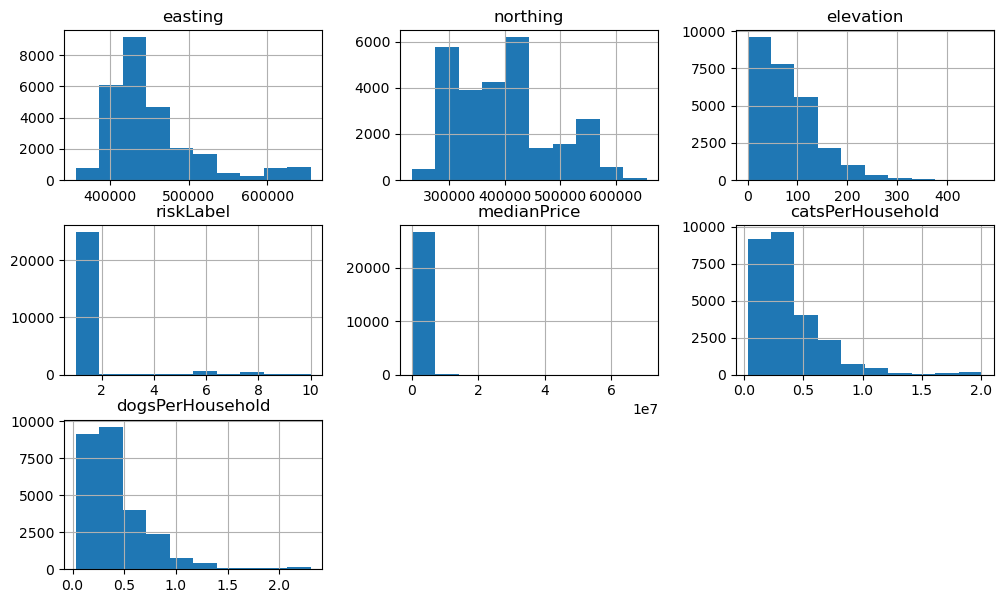

In [14]:
data.hist(figsize=(12,7))

This graph shows that i need to normalise the numerical values.

/Users/dunbarinodusi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dunbarinodusi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dunbarinodusi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


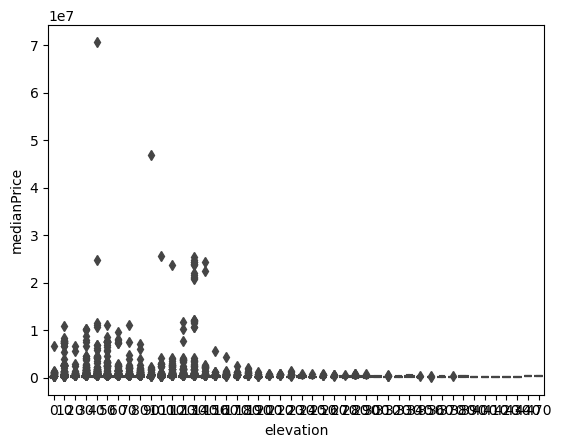

In [15]:
fig, ax = plt.subplots()
sns.boxplot(x='elevation', y='medianPrice', data=df)
plt.show()

7 * 1e7 is a £70m house and is skewing the data massively. I must log-transform this, or scale this feature.

In [ ]:
# Showing relationship between northing and easting
plt.figure(figsize=(15, 8))
sns.scatterplot(x="northing", y="easting", data=data, hue="medianPrice")
plt.show()

#### Below shows the correlation of all features in the dataset, but i can only run it after one-hot encoding.

In [19]:
# data.corr()

In [20]:
# plt.figure(figsize=(10,7))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<br>

### Pipeline and Transformers

In [21]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [22]:
# Read the dataset
data = merged_df
data.dropna(inplace=True)

# Separate features and target variable
X = data.drop(columns=['medianPrice'])
data['medianPrice'] = data['medianPrice'].apply(lambda x: np.log(x + 1))
y = data['medianPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical columns, cant define 'medianPrice' because its the target variable
numeric_cols =  ['easting', 'northing', 'elevation', 'catsPerHousehold', 'dogsPerHousehold', 'riskLabel']
categorical_cols = data.select_dtypes(exclude= np.number).columns

In [23]:
# Define preprocessing for numerical features
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', MinMaxScaler())
])
num_pipe.fit(X_train[numeric_cols])

X_train_prep = pd.DataFrame(num_pipe.transform(X_train[numeric_cols]), columns=numeric_cols)
X_test_prep = pd.DataFrame(num_pipe.transform(X_test[numeric_cols]), columns=numeric_cols)
X_train_prep;

In [24]:
# custom_ohe = CustomOneHotEncoder(categorical_cols)

# Define preprocessing for categorical features
cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 
#     ('ordinal', OrdinalEncoder())
])

cat_pipe.fit(X_train[categorical_cols])
X_train_cat_prep = cat_pipe.transform(X_train[categorical_cols])
X_test_cat_prep = cat_pipe.transform(X_test[categorical_cols])
X_test_cat_prep, X_test_cat_prep.shape ;


In [25]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_cols),
        ('cat', cat_pipe, categorical_cols)
    ])


preprocessor.fit(X_train)
X_train_preproc = preprocessor.transform(X_train)
X_test_preproc = preprocessor.transform(X_test)
X_train_preproc, X_train_preproc.shape;

In [26]:
# Create the full pipeline with preprocessing and RFR model

rfr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor())
                              ])
rfr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['easting', 'northing',
                                                   'elevation',
                                                   'catsPerHousehold',
                                                   'dogsPerHousehold',
                                                   'riskLabel']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['postcode', 'soilType', 'localAuthority', 'historicallyFlooded',
       'postcodeDistrict'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [27]:
# Fit the pipeline (preprocessing + model) on the training data
rfr_pipeline.fit(X_train, y_train)

y_pred = rfr_pipeline.predict(X_test)


In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, max_error, explained_variance_score


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
explained_var_score = explained_variance_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Explained Variance Score: {explained_var_score}")
print(f"Median Absolute Error (MedAE): {medae}")
print(f"Max Error: {max_err}")



Mean Squared Error (MSE): 0.16414219847499834
R-squared (R2): 0.5519419125836561
Mean Absolute Error (MAE): 0.2478484511099052
Root Mean Squared Error (RMSE): 0.4051446636388024
Explained Variance Score: 0.5527965618764161
Median Absolute Error (MedAE): 0.14318067738960494
Max Error: 4.743614463401439


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
model = SVR(kernel='rbf')


svr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                              ])

svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


In [ ]:
# from sklearn.linear_model import LinearRegression, LogisticRegression
# LiR= LinearRegression()
# # LiR = LinearRegression()
# LiR_model = LiR.fit(X_train, y_train)
# LiR_pred = LiR.predict(X_test)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(
    objective ='reg:squarederror',  # Specify the objective for regression tasks
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage used in update to prevent overfitting
    max_depth=8,  # Maximum depth of a tree
    random_state=42
)

xgb_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                              ])

xgb_model.fit(X_train, y_train)
xgboost_predicted = xgb_model.predict(X_test)


In [ ]:
from sklearn.dummy import DummyClassifier
DC = DummyClassifier()

DC_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', DC)
                              ])
DC_model = DC_model.fit(X_train, y_train)
DC_pred = DC_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
len(y_test)
RMS_Dummy = mean_squared_error(y_test, DC_pred)
# RMS_Linear = mean_squared_error(y_test, LiR_pred)
RMS_svr = mean_squared_error(y_test, y_pred)
RMS_xgboost = mean_squared_error(y_test, xgboost_predicted)


print(f"Mean Squared Error DUMMY CLASSIFIER: {RMS_Dummy}\n")
# print(f"Mean Squared Error LINEAR MODEL: {RMS_Linear}\n")
print(f"Mean Squared Error SVR: {RMS_svr}\n")
print(f"Mean Squared Error XGBOOST: {RMS_xgboost}")